# Building Chemical Reaction Networks (CRNs) Directly with BioCRNpyler

**Overview:**  This tutorial shows how to use [BioCRNpyler](https://github.com/BuildACell/BioCRNPyler) to represent simple CRNs

## What is a CRN?
A CRN is a widely established model of chemistry and biochemistry.
* A set of species $S$
* A set of reactions $R$ interconvert species $I_r$ to $O_r$

\begin{align}
\\
I \xrightarrow[]{\rho(s)} O
\\
\end{align}

 * $I$ and $O$ are multisets of species $S$. 
 * $\rho(s): S \to \mathbb{R}$ is a function that determines how fast the reaction occurs.


In [2]:
#Import everything from biocrnpyler
from biocrnpyler import *

#Used for simulating and plotting
import numpy as np
import pylab as plt

## Combining Species and Reactions into a CRN

The following code defines a species called 'S' made out of material 'material'. Species can also have attributes to help identify them. Note that Species with the same name, but different materials or attributes are considered different species in terms of the reactions they participate in.

    S = Species('name', material_type = 'material', attributes = [])

The collowing code produces a reaction R
    
    R = Reaction(Inputs, Outputs, k)

here Inputs and Outputs must both be a list of Species. the parameter k is the rate constant of the reaction. By default, propensities in BioCRNpyler are massaction:

### $\rho(S) = k \Pi_{s} s^{I_s}$

Note: for stochastic models mass action propensities are $\rho(S) = k \Pi_{s} s!/(s - I_s)!$.

Massaction reactions can be made reversible with the k_rev keyword:

    R_reversible = Reaction(Inputs, Outputs, k, k_rev = krev)

is the same as two reactions:

    R = Reaction(Inputs, Outputs, k)
    Rrev = Reaction(Outputs, Inputs, krev)


Finally, a CRN can be made by combining species and reactions:

    CRN = ChemicalReactionNetwork(species = species, reactions = reactions)


In [3]:
#Example: Model the CRN consisting of: A --> 2B, 2B <--> B + C where C has the same name as B but a new material
A = Species("A", material_type = "m1", attributes = ["attribute"])
B = Species("B", material_type = "m1")
C = Species("B", material_type = "m2")
D = Species("D")

print("Species can be printed to show their string representation:", A, B, C, D)

#Reaction Rates
k1 = 3.
k2 = 1.4
k2rev = 0.15

#Reaciton Objects
R1 = Reaction([A], [B, B], k1)
R2 = Reaction([B], [C, D], k2)

print("\nReactions can be printed as well:\n", R1,"\n", R2)

#Make a CRN
CRN = ChemicalReactionNetwork(species = [A, B, C, D], reactions = [R1, R2])

#CRNs can be printed in two different ways
print("\nDirectly printing a CRN shows the string representation of the species used in BioCRNpyler:")
print(CRN)

print("\nCRN.pretty_print(...) is a function that prints a more customizable version of the CRN, but doesn't show the proper string representation of species.")
print(CRN.pretty_print(show_materials = True, show_rates = True, show_attributes = True))

Species can be printed to show their string representation: m1_A_attribute m1_B m2_B D

Reactions can be printed as well:
 m1_A_attribute --> 2 m1_B        massaction: k_f(m1_A_attribute)=3.0*m1_A_attribute 
 m1_B --> m2_B + D        massaction: k_f(m1_B)=1.4*m1_B

Directly printing a CRN shows the string representation of the species used in BioCRNpyler:
Species = m1_A_attribute, m1_B, m2_B, D
Reactions = [
	m1_A_attribute --> 2 m1_B        massaction: k_f(m1_A_attribute)=3.0*m1_A_attribute
	m1_B --> m2_B + D        massaction: k_f(m1_B)=1.4*m1_B
]

CRN.pretty_print(...) is a function that prints a more customizable version of the CRN, but doesn't show the proper string representation of species.
Species (4) = {0. m1[A(attribute)], 1. m1[B], 2. m2[B], 3. D}
Reactions (2) = [
0. m1[A(attribute)] --> 2 m1[B]        
        massaction: k_f(m1[A(attribute)])=3.0*m1[A(attribute)]
1. m1[B] --> m2[B] + D        
        massaction: k_f(m1[B])=1.4*m1[B]
]


## CRNs can be saved as SBML and simulated

To save a CRN as SBML:

    CRN.write_sbml_file("file_name.xml")

To simulate a CRN with biosrape:

    Results, Model = CRN_expression.simulate_with_bioscrape(timepoints, initial_condition_dict = x0)

Where x0 is a dictionary: x0 = {str(species_name):initial_value}

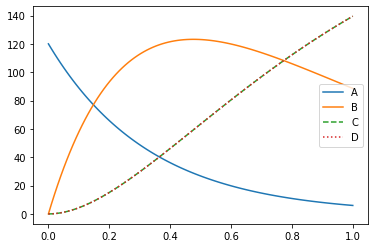

In [6]:
#Saving and simulating a CRN
CRN.write_sbml_file("build_crns_directly.xml")


try:
    import bioscrape
    import numpy as np
    import pylab as plt
    import pandas as pd
    
    #Initial conditions can be set with a dictionary:
    x0 = {str(A):120}
    timepoints = np.linspace(0, 1, 100)#Timepoints to simulate over

    R = CRN.simulate_with_bioscrape(timepoints = timepoints, initial_condition_dict = x0)
    #Can also simulate and save at the same time
    #R, M = CRN.simulate_with_bioscrape_via_sbml(timepoints = timepoints, initial_condition_dict = x0, file_name = "build_crns_directly.xml")

     #Check to ensure simulation worked
    #Results are in a Pandas Dictionary and can be accessed via string-names of species
    plt.plot(R['time'], R[str(A)], label = "A")
    plt.plot(R['time'], R[str(B)], label = "B")
    plt.plot(R['time'], R[str(C)], "--", label = "C")
    plt.plot(R['time'], R[str(D)],":", label = "D")
    plt.legend()

except ModuleNotFoundError:
    print("Plotting Modules not installed.")

## ComplexSpecies and OrderedComplexSpecies

When Species bind together to form complexes, it is recommended to use the ComplexSpecies, Multimer, or OrderedComplexSpecies subclasses which contain information about the species inside of them. ComplexSpecies treats its internal species as an unordered multiset. Multimer contains $n$ compies of a sinlge Species. OrderedComplexSpecies treats its internal species as an ordered list.

_Note: These objects do not automatically generate binding reactions. To do that, use the Component wrappers ChemicalComplex and OrderedChemicalComplex._

In [ ]:
A = Species("A", material_type = "m1")
B = Species("B", material_type = "m1")
B2 = Species("B", material_type = "m2")

print("\nFor ComplexSpecies, the order of the elements does not matter:")
C1 = ComplexSpecies([A, B, B2, A])
C2 = ComplexSpecies([B, A, B2, A])
print("C1=ComplexSpecies([A, B, B2, A])=", C1)
print("C2=ComplexSpecies([B, A, B2, A])=", C2)
print("C1==C2 ==>", C1==C2)

print("\nMultimers are the same as ComplexSpecies:")
M1 = ComplexSpecies([A]*3)
M2 = Multimer(A, 3)
print("ComplexSpecies([A]*3)", M1)
print("Multimer(A, 3)", M2)
print("M1 == M2 ==>", M1 == M2)

print("\nFor OrderedComplexSpecies, the Order Does Matter:")
C3 = OrderedComplexSpecies([A, B, B2, A])
C4 = OrderedComplexSpecies([B, A, B2, A])
print("C3=OrderedComplexSpecies([A, B, B2, A])=", C3)
print("C4=OrderedComplexSpecies([B, A, B2, A])=", C4)
print("C3==C4 ==>", C3==C4)

print("\nComplexSpecies (and the OrderedComplexSpecies and Multimers) are Species and can be used in reactions:")
R = Reaction([A, B, B2, A], [C1], k = 10)
print("Reaction([A, B, B2, A], [C1], k = 10)=")
print(R)

## Non-massaction propensities in BioCRNpyler
By default, BioCRNpyler assumes that propensities are massaction with only one parameter, the rate constant $k$. However, non-massaction propensities are also supported. However, additional propensity types are also supported. When creating a reaction with non-massaction propensities, a propensity_params dictionary must be passed into the chemical_reaction_network.reaction constructor with the appropriate parameters for that particular propensity type. The supported propensity types and their relevant parameters are:

1. "massaction": $\rho(S) = k \Pi_{s} s^{I_s}$. Required parameters: "k" the rate constant. Note: for stochastic models mass action propensities are $\rho(S) = k \Pi_{s} s!/(s - I_s)!$.
2. "positivehill": $\rho(s) = k \frac{s^n}{(K^n+s^n)}$. Requried parameters: rate constant "k", offset "K", hill coefficient "n", hill species "s1".
3. "negativehill": $\rho(s) = k \frac{1}{(K^n+s^n)}$. Requried parameters: rate constant "k", offset "K", hill coefficient "n", hill species "s1".
4. "proportionalpositivehill": $\rho(s) = k d \frac{s^n}{(K^n+s^n)}$. Requried parameters: rate constant "k", offset "K", hill coefficient "n", hill species "s1", propritional species "d".
5. "proportionalnegativehill": $\rho(s) = k d \frac{1}{(K^n+s^n)}$. Requried parameters: rate constant "k", offset "K", hill coefficient "n", hill species "s1", propritional species "d".
6. "general": $\rho(s) = f(s)$ where $f$ can be any algebraic function typed as a string. Required parameters: "rate" an algebraic expression including species and model parameters written as a string.

The following notebook contains examples of the propensity types support by BioCRNpyler applied to a very simple model of genetic activation and repression.

In [ ]:
from biocrnpyler.chemical_reaction_network import Species, Reaction, ComplexSpecies, ChemicalReactionNetwork

#Parameter Values
kb = 100
ku = 10
kex = 1.
kd = .1

#Species
G = Species(name = "G", material_type = "dna") #DNA
A = Species(name = "A", material_type = "protein") #Activator
GA = ComplexSpecies([G, A, A]) #Activated Gene
X = Species(name = "X", material_type = "protein")

rxnd = Reaction([X], [], kd)

#Massaction Activation
species1 = [G, A, GA, X]
rxn0_1 = Reaction([G, A, A], [GA], k=kb, k_rev = ku)
rxn0_2 = Reaction([GA], [GA, X], k=kex)
CRN0 = ChemicalReactionNetwork(species1, [rxn0_1, rxn0_2, rxnd])
print("\nMassaction Activation", repr(CRN0))

#Massaction Repressed
rxn1_1 = Reaction([G, A, A], [GA], k=kb, k_rev = ku)
rxn1_2 = Reaction([G], [G, X], k=kex)
CRN1 = ChemicalReactionNetwork(species1, [rxn1_1, rxn1_2, rxnd])
print("\nMassaction Repression", repr(CRN1))

#hill positive
species2 = [G, A, X]
rxn2_1 = Reaction([G], [G, X], propensity_type = "hillpositive", propensity_params = {"k":kex, "n":2, "K":float(kb/ku), "s1":A})
CRN2 = ChemicalReactionNetwork(species2, [rxn2_1, rxnd])
print("\nHill Positive CRN", repr(CRN2))

#proportional hill positive
rxn3_1 = Reaction([G], [G, X], propensity_type = "proportionalhillpositive", propensity_params = {"k":kex, "n":2, "K":float(kb/ku), "s1":A, "d":G})
CRN3 = ChemicalReactionNetwork(species2, [rxn3_1, rxnd])
print("\nProportional Hill Positive CRN", repr(CRN3))

#hill Negative
rxn4_1 = Reaction([G], [G, X], propensity_type = "hillnegative", propensity_params = {"k":kex, "n":2, "K":float(kb/ku), "s1":A})
CRN4 = ChemicalReactionNetwork(species2, [rxn4_1, rxnd])
print("\nHill Negative CRN", repr(CRN4))

#proportional hill negative
rxn5_1 = Reaction([G], [G, X], propensity_type = "proportionalhillnegative", propensity_params = {"k":kex, "n":2, "K":float(kb/ku), "s1":A, "d":G})
CRN5 = ChemicalReactionNetwork(species2, [rxn5_1, rxnd])
print("\nProportional Hill Negative CRN", repr(CRN5))